In [1]:
import json
from os.path import join as pjoin
import nltk

In [2]:
def data_from_json(filename):
    data = []
    with open(filename) as data_file:
        for l in data_file:
            data.append(json.loads(l))
    return data

In [3]:
train_file_name = pjoin("queries", "freebuild.json")
data = data_from_json(train_file_name)

In [10]:
data

[{u'q': u'(:q "add red")',
  u'qid': u'1',
  u'sessionId': u'MT_sidaw',
  u'time': u'2017-02-03T03:09:33.408'},
 {u'q': u'(:accept "add red" "(: add red here)")',
  u'qid': u'2',
  u'sessionId': u'MT_sidaw',
  u'time': u'2017-02-03T03:09:33.891'},
 {u'q': u'(:q "repeat 2 [select left]")',
  u'qid': u'3',
  u'sessionId': u'MT_AIWEXPJ',
  u'time': u'2017-02-03T03:23:51.805'},
 {u'q': u'(:accept "repeat 2 [select left]" "(:loop (number 2) (: select (call adj left)))")',
  u'qid': u'4',
  u'sessionId': u'MT_AIWEXPJ',
  u'time': u'2017-02-03T03:24:04.667'},
 {u'q': u'(:q "repeat 2 [select front]")',
  u'qid': u'5',
  u'sessionId': u'MT_AIWEXPJ',
  u'time': u'2017-02-03T03:24:25.707'},
 {u'q': u'(:accept "repeat 2 [select front]" "(:loop (number 2) (: select (call adj front)))")',
  u'qid': u'6',
  u'sessionId': u'MT_AIWEXPJ',
  u'time': u'2017-02-03T03:24:28.891'},
 {u'q': u'(:q "repeat 5 [add red; select right]; select left")',
  u'qid': u'7',
  u'sessionId': u'MT_AIWEXPJ',
  u'time': u'20

In [4]:
def filter_func(d):
    if "accept" in d['q']:
        return 

In [4]:
accept_q = filter(lambda d: "accept" in d['q'], data)

In [6]:
len(accept_q)

36589

In [5]:
# then break accept_q down to input and query
accept_q = map(lambda d: d['q'], accept_q)

In [7]:
accept_q

[u'(:accept "add red" "(: add red here)")',
 u'(:accept "repeat 2 [select left]" "(:loop (number 2) (: select (call adj left)))")',
 u'(:accept "repeat 2 [select front]" "(:loop (number 2) (: select (call adj front)))")',
 u'(:accept "repeat 5 [add red; select right]; select left" "(:s (:loop (number 5) (:s (: add red here) (: select (call adj right)))) (: select (call adj left)))")',
 u'(:accept "select back; repeat 4 [add red; select back]; select left; select front" "(:s (:s (:s (: select (call adj back)) (:loop (number 4) (:s (: add red here) (: select (call adj back))))) (: select (call adj left))) (: select (call adj front)))")',
 u'(:accept "repeat 4 [add red; select left]; select right" "(:s (:loop (number 4) (:s (: add red here) (: select (call adj left)))) (: select (call adj right)))")',
 u'(:accept "select front; repeat 3 [add red; select front]" "(:s (: select (call adj front)) (:loop (number 3) (:s (: add red here) (: select (call adj front)))))")',
 u'(:accept "repeat 2 

In [7]:
import re
re.findall('"([^"]*)"', u'(:accept "add red" "(: add red here)")')

[u'add red', u'(: add red here)']

In [8]:
accept_q = map(lambda s: re.findall('"([^"]*)"', s), accept_q)

In [9]:
len(accept_q[9][1])

695

In [10]:
# max length query
len_query = map(lambda s: len(s[1]), accept_q)
len_inp = map(lambda s: len(s[0]), accept_q)

In [11]:
# return index
def get_max_index(a, m):
    return [i for i, j in enumerate(a) if j == m]

In [13]:
max(len_query)

82655

In [25]:
max(len_inp)

199

In [28]:
get_max_index(len_query, 82655)

[17361, 25052]

In [29]:
get_max_index(len_inp, 199)

[4257, 10402, 10573, 10682, 11481, 11486, 11492, 13356, 23326]

In [14]:
len_query[11492]

1034

In [13]:
accept_q[9][0]

u'repeat 3 [add red ring 5; select top]'

In [26]:
# let's come up with a ratio to reject some too crazy ones?
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import numpy as np
ratio = np.array(len_query, dtype=np.float32) / np.array(len_inp, dtype=np.float32)

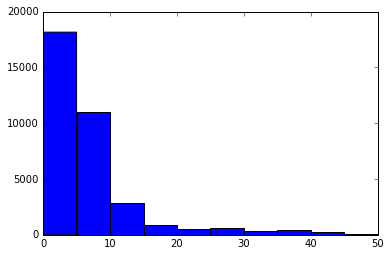

In [29]:
n, bins, patches = plt.hist(ratio, histtype="bar", bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [30]:
ratio

array([  2.28571439,   2.0454545 ,   2.        , ...,   7.18181801,
         9.        ,  18.1428566 ], dtype=float32)

In [31]:
n

array([ 18158.,  10982.,   2854.,    918.,    480.,    613.,    321.,
          469.,    253.,     94.])

In [76]:
np.sum(n)

32032.0

In [12]:
ratio.shape

(36589,)

In [125]:
31994.0 / 36589

0.8744158080297357

In [13]:
# get corresponding rows out of accept_q, then split them into source/target, store them into file
# then we can do massive preprocessing migration from NLC/PA4
accept_idx, = np.nonzero(ratio < 15)

In [84]:
accept_idx

array([    0,     1,     2, ..., 36584, 36586, 36587])

In [14]:
sat_q = np.take(accept_q, accept_idx).tolist()

In [15]:
sat_q

[[u'add red', u'(: add red here)'],
 [u'repeat 2 [select left]', u'(:loop (number 2) (: select (call adj left)))'],
 [u'repeat 2 [select front]',
  u'(:loop (number 2) (: select (call adj front)))'],
 [u'repeat 5 [add red; select right]; select left',
  u'(:s (:loop (number 5) (:s (: add red here) (: select (call adj right)))) (: select (call adj left)))'],
 [u'select back; repeat 4 [add red; select back]; select left; select front',
  u'(:s (:s (:s (: select (call adj back)) (:loop (number 4) (:s (: add red here) (: select (call adj back))))) (: select (call adj left))) (: select (call adj front)))'],
 [u'repeat 4 [add red; select left]; select right',
  u'(:s (:loop (number 4) (:s (: add red here) (: select (call adj left)))) (: select (call adj right)))'],
 [u'select front; repeat 3 [add red; select front]',
  u'(:s (: select (call adj front)) (:loop (number 3) (:s (: add red here) (: select (call adj front)))))'],
 [u'repeat 2 [select back; select right]',
  u'(:loop (number 2) (:s

In [16]:
len(sat_q)

31994

In [18]:
# also eliminate multiple parses
# good news is that they are exactly the same repeat....so shouldn't be hard to add 
# a bit more constraint to RNN to figure this out
num_parsed_query = map(lambda e: len(e), sat_q)

In [94]:
sat_q[9]

[u'repeat 4 [add red ring 5; select top]; select bot; repeat 2 [select front]',
 u'(:isolate (:s (:s (:loop (number 4) (:s (:s (:loop (number 2) (: select (call adj left))) (:loop (number 2) (: select (call adj front))) (:s (:loop (number 5) (:s (: add red here) (: select (call adj right)))) (: select (call adj left))) (:s (:s (:s (: select (call adj back)) (:loop (number 4) (:s (: add red here) (: select (call adj back))))) (: select (call adj left))) (: select (call adj front))) (:s (:loop (number 4) (:s (: add red here) (: select (call adj left)))) (: select (call adj right))) (:s (: select (call adj front)) (:loop (number 3) (:s (: add red here) (: select (call adj front))))) (:loop (number 2) (:s (: select (call adj back)) (: select (call adj right))))) (: select (call adj top)))) (: select (call adj bot))) (:loop (number 2) (: select (call adj front)))))',
 u'(:isolate (:s (:s (:loop (number 4) (:s (:s (:loop (number 2) (: select (call adj left))) (:loop (number 2) (: select (cal

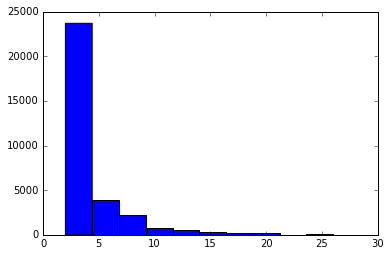

In [92]:
n, bins, patches = plt.hist(num_parsed_query, histtype="bar")

In [93]:
n

array([ 23690.,   3945.,   2231.,    708.,    515.,    355.,    217.,
          231.,     29.,     73.])

In [119]:
bins

array([  2. ,   4.4,   6.8,   9.2,  11.6,  14. ,  16.4,  18.8,  21.2,
        23.6,  26. ])

In [118]:
23690. + 3945. + 2231.
29866.0 / 36589  # if we allow duplication, we can get 81% of data out -> reptition less than 10

0.81625625187898

In [95]:
23690.0 / 36589
# wow, we can only train on 64% of the original data

0.6474623520730274

In [19]:
select_idx, = np.nonzero(np.array(num_parsed_query) == 2)

In [20]:
small_q = np.take(sat_q, select_idx).tolist()

In [21]:
len(small_q)

14051

In [22]:
trimmed_q = map(lambda e: [e[0], e[1]], sat_q)  # we only take 2 from the lists (ignore repeats)

In [123]:
trimmed_q

[[u'add red', u'(: add red here)'],
 [u'repeat 2 [select left]', u'(:loop (number 2) (: select (call adj left)))'],
 [u'repeat 2 [select front]',
  u'(:loop (number 2) (: select (call adj front)))'],
 [u'repeat 5 [add red; select right]; select left',
  u'(:s (:loop (number 5) (:s (: add red here) (: select (call adj right)))) (: select (call adj left)))'],
 [u'select back; repeat 4 [add red; select back]; select left; select front',
  u'(:s (:s (:s (: select (call adj back)) (:loop (number 4) (:s (: add red here) (: select (call adj back))))) (: select (call adj left))) (: select (call adj front)))'],
 [u'repeat 4 [add red; select left]; select right',
  u'(:s (:loop (number 4) (:s (: add red here) (: select (call adj left)))) (: select (call adj right)))'],
 [u'select front; repeat 3 [add red; select front]',
  u'(:s (: select (call adj front)) (:loop (number 3) (:s (: add red here) (: select (call adj front)))))'],
 [u'repeat 2 [select back; select right]',
  u'(:loop (number 2) (:s

In [23]:
# create the dataset...
# it's actually quite easy to split this into train/val/test set! since they are already joint
train_split = 0.9
val_split = 0.05
test_split = 0.05
total = len(final_q)

NameError: name 'final_q' is not defined

In [128]:
np.ceil(total * train_split)

12646.0

In [131]:
train_q = final_q[0:int(np.ceil(total * train_split))]
val_q = final_q[int(np.ceil(total * train_split)):int(np.ceil(total * (train_split + val_split)))]
test_q = final_q[int(np.ceil(total * (train_split + val_split))):]

In [132]:
len(train_q)

12646

In [133]:
len(val_q)

703

In [134]:
len(test_q)

702

[[u'l blue',
  u'(:isolate (:s (:isolate (: select (call adj left))) (: add blue here)))'],
 [u'u blue', u'(:isolate (:s (: select (call adj top)) (: add blue here)))'],
 [u'l blue',
  u'(:isolate (:s (:isolate (: select (call adj left))) (: add blue here)))'],
 [u'd blue',
  u'(:isolate (:s (: select (call adj bot this)) (: add blue here)))'],
 [u'd blue',
  u'(:isolate (:s (: select (call adj bot this)) (: add blue here)))'],
 [u'b blue',
  u'(:isolate (:s (:isolate (: select (call adj back))) (: add blue here)))'],
 [u'u red', u'(:isolate (:s (: select (call adj top)) (: add red here)))'],
 [u'f red',
  u'(:isolate (:s (:isolate (: select (call adj front))) (: add red here)))'],
 [u'l red',
  u'(:isolate (:s (:isolate (: select (call adj left))) (: add red here)))'],
 [u'l red',
  u'(:isolate (:s (:isolate (: select (call adj left))) (: add red here)))'],
 [u'l red',
  u'(:isolate (:s (:isolate (: select (call adj left))) (: add red here)))'],
 [u'd red',
  u'(:isolate (:s (: select

In [33]:
pkl_train_name = pjoin("data", "tok_small_q_test.pkl")

In [34]:
import pickle
train_data = None
with open(pkl_train_name, "rb") as f:
    train_data = pickle.load(f)

In [35]:
len(train_data)

702

In [40]:
train_data[10][0]

[26, 65, 78, 27, 60, 35, 60, 35, 80]

In [65]:
train_data[2][0]

u'add brown left 2'

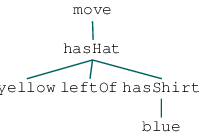

In [21]:
from nltk.tree import Tree
Tree.fromstring("""(move(hasHat(yellow) leftOf(hasShirt(blue))))""")

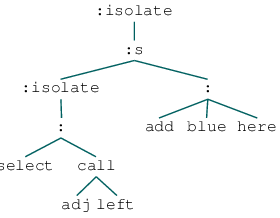

In [24]:
Tree.fromstring("""(:isolate (:s (:isolate (: select (call adj left))) (: add blue here)))""")

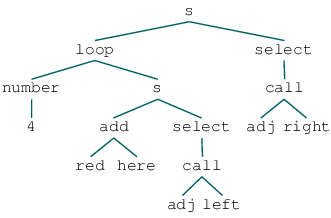

In [41]:
"repeat 4 [add red; select left]; select right"
Tree.fromstring("""(:s (:loop (number 4) (:s (: add red here) (: select (call adj left)))) (: select (call adj right)))""".replace(":", ""))

In [42]:
parsed_tree = Tree.fromstring("""(:s (:loop (number 4) (:s (: add red here) (: select (call adj left)))) (: select (call adj right)))""".replace(":", ""))

In [51]:
def traverseTree(tree, parts):
    parts.append(tree.label())
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:
            traverseTree(subtree, parts)
        else:
            parts.append(subtree)

In [49]:
parts = []
traverseTree(parsed_tree, parts)

4
red
here
adj
left
adj
right


In [52]:
" ".join(parts)

's loop number 4 s add red here select call adj left select call adj right'

AttributeError: 'Tree' object has no attribute 'left'

In [57]:
"repeat 4 [add red; select left]; select right".replace("[", "[ ").replace("]", " ]").replace(";", " ;")

'repeat 4 [ add red ; select left ] ; select right'

In [19]:
"{bridge zigs}".replace("{", "{ ").replace("}", " }")

'{ bridge zigs }'

In [22]:
"plane(1,4,5)".replace("(", " ( ").replace(")", " ) ").replace(",", " , ")

'plane ( 1 , 4 , 5 ) '

In [24]:
"5x3".replace("x", " x ")

'5 x 3'

In [67]:
from nltk.tree import Tree

def traverseTree(tree, parts):
    # this is pre-order traversal
    # Kelvin's paper uses in-order traversal
    parts.append(tree.label())
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:
            traverseTree(subtree, parts)
        else:
            parts.append(subtree)

def linearize(q):
    for line in q:
        parse = line[1]  # this is at least one of the parses
        parsed_tree = Tree.fromstring(parse.replace(":", ""))  # remove all ":"
        sent = line[0]
        # 'repeat 4 [ add red ; select left ] ; select right'

        # Tokenizing everything
        sent = sent.replace("[", " [ ").replace("]", " ] ").replace(";", " ; ")  # so we can tokenize by space
        sent = sent.replace("{", "{ ").replace("}", " }").replace("/", " / ")
        sent = sent.replace("(", " ( ").replace(")", " ) ").replace(",", " , ").replace("x", " x ")

        # remove "\\"
        sent = sent.replace("\\", "")

        # more than one blank space becomes just one
        sent = re.sub(' +', ' ', sent)

        parts = []
        traverseTree(parsed_tree, parts)
        str_tree = " ".join(parts)

        line[0] = sent
        line[1] = str_tree

In [68]:
linearize(small_q)

In [70]:
len_query = map(lambda s: len(s[1].split(" ")), small_q)
len_inp = map(lambda s: len(s[0].split(" ")), small_q)

In [71]:
max(len_inp)

77

In [72]:
max(len_query)

133

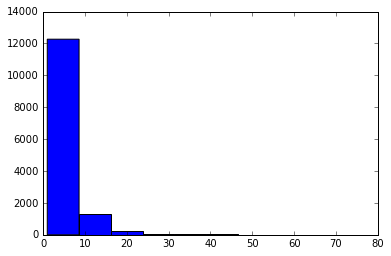

In [73]:
n, bins, patches = plt.hist(len_inp, histtype="bar")

In [75]:
bins

array([  1. ,   8.6,  16.2,  23.8,  31.4,  39. ,  46.6,  54.2,  61.8,
        69.4,  77. ])

In [88]:
np.sum(np.array(len_inp) < 15)

13445

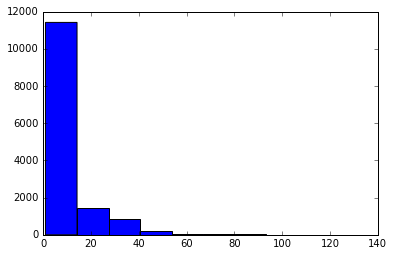

In [79]:
n, bins, patches = plt.hist(len_query, histtype="bar")

In [91]:
n

array([  1.14190000e+04,   1.42600000e+03,   8.62000000e+02,
         1.96000000e+02,   6.70000000e+01,   2.70000000e+01,
         2.00000000e+01,   1.60000000e+01,   1.40000000e+01,
         4.00000000e+00])

In [80]:
bins

array([   1. ,   14.2,   27.4,   40.6,   53.8,   67. ,   80.2,   93.4,
        106.6,  119.8,  133. ])

In [81]:
np.sum(np.array(len_inp) < 40)

13980

In [89]:
res = filter(lambda s: s[0] < 15 and s[1] < 40, zip(len_inp, len_query))

In [90]:
len(res)

13301

In [107]:
def add_sos_eos(tokens):
    return map(lambda token_list: [1] + token_list + [2], tokens)

def padded(tokens, batch_pad=0):
    maxlen = max(map(lambda x: len(x), tokens)) if batch_pad == 0 else batch_pad
    return map(lambda token_list: token_list + [0] * (maxlen - len(token_list)), tokens)


def pair_iter(q, batch_size, inp_len, query_len):
    # use inp_len, query_len to filter list
    batched_input = []
    batched_query = []
    iter_q = q[:]

    while len(iter_q) > 0:
        while len(batched_input) < batch_size and len(iter_q) > 0:
            pair = iter_q.pop(0)
            if len(pair[0]) <= inp_len and len(pair[1]) <= query_len:
                batched_input.append(pair[0])
                batched_query.append(pair[1])

        padded_input = padded(batched_input)
        batched_query = add_sos_eos(batched_query)
        padded_query =  padded(batched_query)
        yield np.array(padded_input, dtype=np.int32), np.array(padded_query, dtype=np.int32)
        batched_input, batched_query = [], []

In [108]:
for b_i, b_q in pair_iter(train_data, 40, 15, 40):
    print(b_i.shape)

(40, 13)
(40, 14)
(40, 13)
(40, 15)
(40, 11)
(40, 14)
(40, 13)
(40, 13)
(40, 13)
(40, 12)
(40, 13)
(40, 9)
(40, 15)
(40, 6)
(40, 9)
(40, 12)
(29, 13)


In [105]:
len(train_data)

702

In [110]:
def postprocess(s_list):
    w_list = []
    for c in s_list:
        r_par = c.count(')')
        l_par = c.count('(')
        if r_par > 1:
            c = re.sub('\)\)+', ')', c)
            w_list.append(c)
            for _ in range(r_par - 1):
                w_list.append(')')
        elif l_par > 1:
            c = re.sub('\(\(+', '(', c)
            for _ in range(r_par - 1):
                w_list.append('(')
            w_list.append(c)
        else:
            w_list.append(c)

    return w_list

def src_tokenizer(s):
    words = basic_tokenizer(unicode(s))
    new_words = []
    for w in words:
        r_punct = re.findall(r"[\w']+|[.,!?;\(\)\[\]]", w)
        
        segs = []
        for seg in r_punct:
            r_multi2 = re.findall(r"[\d+](x)[\d+]", seg)
            r_multi3 = re.findall(r"(\d+)(x)(\d+)(x)(\d+)", seg)
            print(r_multi2)
            print(r_multi3)
            if len(r_multi2) != 0:
                segs.extend(list(r_multi2[0]))
            elif len(r_multi3) != 0:
                segs.extend(list(r_multi3[0]))
            else:
                segs.append(seg)

        new_words.extend(segs)
        
    return new_words

def basic_tokenizer(sentence):
    words = []
    for space_separated_fragment in sentence.strip().split():
        words.extend(re.split(" ", space_separated_fragment))
    return [w for w in words if w]

In [79]:
r_punct = re.findall(r"[\w']+|[.,!?;\(\)\[\]]", 'this is fine, and ok')

In [80]:
r_punct

['this', 'is', 'fine', ',', 'and', 'ok']

In [100]:
r_multi2 = re.findall(r"(\d+)(x)(\d+)", '2x3')

In [103]:
list(r_multi2[0])

['2', 'x', '3']

In [93]:
src_tokenizer('repeat 2 [select back; select right]; repeat 2 [select right]; select 3x3x2')

[u'repeat',
 u'2',
 u'[',
 u'select',
 u'back',
 u';',
 u'select',
 u'right',
 u']',
 u';',
 u'repeat',
 u'2',
 u'[',
 u'select',
 u'right',
 u']',
 u';',
 u'select',
 (u'3', u'x', u'3')]

In [26]:
len(small_q)

14051

In [30]:
small_q[2][1]

u'(:loop (number 2) (: select (call adj front)))'

In [36]:
small_q[15][1]

u'(:s (:loop (number 2) (:s (: select (call adj back)) (: select (call adj right)))) (:loop (number 2) (: select (call adj right))))'

In [38]:
postprocess(basic_tokenizer(small_q[15][1]))

[u'(:s',
 u'(:loop',
 u'(number',
 u'2)',
 u'(:s',
 u'(:',
 u'select',
 u'(call',
 u'adj',
 u'back)',
 ')',
 u'(:',
 u'select',
 u'(call',
 u'adj',
 u'right)',
 ')',
 ')',
 ')',
 u'(:loop',
 u'(number',
 u'2)',
 u'(:',
 u'select',
 u'(call',
 u'adj',
 u'right)',
 ')',
 ')',
 ')']

In [39]:
small_q[15][0]

u'repeat 2 [select back; select right]; repeat 2 [select right]'

In [42]:
src_tokenizer(small_q[15][0])

[u'repeat',
 u'2',
 u'[',
 u'select',
 u'back',
 u';',
 u'select',
 u'right',
 u']',
 u';',
 u'repeat',
 u'2',
 u'[',
 u'select',
 u'right',
 u']']

In [45]:
len(trimmed_q)

31994

In [48]:
_PAD = b"<pad>"
_SOS = b"<sos>"
_EOS = b"<eos>"
_UNK = b"<unk>"
_START_VOCAB = [_PAD, _SOS, _EOS, _UNK]

PAD_ID = 0
SOS_ID = 1
EOS_ID = 2
UNK_ID = 3

In [111]:
def create_vocabulary(list_s, root):
    print("Creating vocabulary %s from data")
    src_vocab = {}
    tgt_vocab = {}

    counter = 0

    for s in list_s:
        counter += 1
        if counter % 1000 == 0:
            print("processing line %d" % counter)

        # tokenize source
        src_tokens = src_tokenizer(s[0])  # hope this is enough

        # tokenize target
        tgt_tokens = postprocess(basic_tokenizer(s[1]))

        for w in src_tokens:
            if w in src_vocab:
                src_vocab[w] += 1
            else:
                src_vocab[w] = 1

        for w in tgt_tokens:
            if w in tgt_vocab:
                tgt_vocab[w] += 1
            else:
                tgt_vocab[w] = 1

    src_vocab_list = _START_VOCAB + sorted(src_vocab, key=src_vocab.get, reverse=True)
    tgt_vocab_list = _START_VOCAB + sorted(tgt_vocab, key=tgt_vocab.get, reverse=True)
    print("Source vocabulary size: %d" % len(src_vocab_list))
    print("Target vocabulary size: %d" % len(tgt_vocab_list))

    with codecs.open(pjoin(root, "src_vocab.dat"), "w", encoding="utf-8") as vocab_file:
        for w in src_vocab_list:
            vocab_file.write(w + "\n")  # .encode('utf-8')
    with codecs.open(pjoin(root, "tgt_vocab.dat"), "w", encoding="utf-8") as vocab_file:
        for w in tgt_vocab_list:
            vocab_file.write(w + "\n")  # .encode('utf-8')

In [112]:
import sys
import codecs
reload(sys)
sys.setdefaultencoding('utf8')

create_vocabulary(trimmed_q, pjoin("data", "nat"))

In [55]:
r = re.findall(r"[\w']+|[.,!?;\(\)\[\]]", '7x7')

In [66]:
r = re.findall(r"(\d+)(x)(\d+)", '1x2')

In [67]:
r

[('1', 'x', '2')]

In [70]:
r = re.findall(r"(\d+)(x)(\d+)(x)(\d+)", '1x2x3')

In [71]:
r

[('1', 'x', '2', 'x', '3')]

In [116]:
from tensorflow.python.platform import gfile
def initialize_vocabulary(vocabulary_path):
    # map vocab to word embeddings
    if gfile.Exists(vocabulary_path):
        rev_vocab = []
        with gfile.GFile(vocabulary_path, mode="r") as f:
            rev_vocab.extend(f.readlines())
        rev_vocab = [line.strip('\n') for line in rev_vocab]
        vocab = dict([(x, y) for (y, x) in enumerate(rev_vocab)])
        return vocab, rev_vocab
    else:
        raise ValueError("Vocabulary file %s not found.", vocabulary_path)

In [117]:
src_vocab, rev_src_vocab = initialize_vocabulary(pjoin("data", "nat", "src_vocab.dat"))
tgt_vocab, rev_tgt_vocab = initialize_vocabulary(pjoin("data", "nat", "tgt_vocab.dat"))

In [118]:
len(rev_src_vocab)

284

In [119]:
len(tgt_vocab)

80

In [122]:
def lists_to_indices(list_s, src_vocab, tgt_vocab):
    counter = 0
    tokenized_s = []
    for s in list_s:
        counter += 1
        if counter % 1000 == 0:
            print("tokenizing line %d" % counter)

        src_tokens = src_tokenizer(s[0])
        tgt_tokens = postprocess(basic_tokenizer(s[1]))

        src_token_ids = [src_vocab.get(w, UNK_ID) for w in src_tokens]
        tgt_token_ids = [tgt_vocab.get(w, UNK_ID) for w in tgt_tokens]

        tokenized_s.append([src_token_ids, tgt_token_ids])

    return tokenized_s

In [123]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

tokenized_q = lists_to_indices(trimmed_q, src_vocab, tgt_vocab)

In [124]:
len(tokenized_q)

31994

In [125]:
def write_to_file(q, root, file_name, text_file=True, pkl_file=True):
    if pkl_file:
        file_path = pjoin(root, file_name + ".pkl")

        with open(file_path, mode="wb") as f:
            pickle.dump(q, f)

    if text_file:
        file_path = pjoin(root, file_name + ".txt")
        with open(file_path, mode="wb") as f:
            for pair in q:
                f.write(str(pair) + b"\n")

def create_dataset(q, root, prefix="", splits=(0.9, 0.05, 0.05), pkl_file=False, text_file=False):
    train_split, val_split, test_split = splits
    total = len(q)

    train_q = q[0:int(np.ceil(total * train_split))]
    val_q = q[int(np.ceil(total * train_split)):int(np.ceil(total * (train_split + val_split)))]
    test_q = q[int(np.ceil(total * (train_split + val_split))):]

    write_to_file(train_q, root, file_name=prefix + "_train", pkl_file=pkl_file, text_file=text_file)
    write_to_file(val_q, root, file_name=prefix + "_val", pkl_file=pkl_file, text_file=text_file)
    write_to_file(test_q, root, file_name=prefix + "_test", pkl_file=pkl_file, text_file=text_file)

In [127]:
import pickle
create_dataset(tokenized_q, pjoin("data", "nat"), splits=(0.2, 0.7, 0.1), prefix="trimmed_q", text_file=True, pkl_file=True)